In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Datos POC Biwares.xlsx",sheet_name="Transcripciones")

In [3]:
# df = pd.read_feather("transcriptions.feather")

In [4]:
df.head()

,AUDIO_NOMBRE,AUDIO_CANAL,AUDIO_DURACION_SEGUNDOS,SEGMENTO_ID,SEGMENTO_SPEAKER_ID,CLIENTE_AGENTE,SEGMENTO_OFFSET_SEGUNDOS,SEGMENTO_DURACION_SEGUNDOS,SEGMENTO_TEXTO,SEGMENTO_CONFIANZA
0,_1_1_544357068 Select.wav,Channel.0.wav,413.25,1,1,AGENTE,3.85,4.27,¿Banco Santander buen día mi nombre es Lucila ...,749842.0
1,_1_1_544357068 Select.wav,Channel.0.wav,413.25,2,2,CLIENTE,8.63,13.88,"Buenos días, hasta luego. Consulta sobre trans...",749842.0
2,_1_1_544357068 Select.wav,Channel.0.wav,413.25,3,1,AGENTE,26.32,1.41,Sobre inválido la figura.,64394027.0
3,_1_1_544357068 Select.wav,Channel.0.wav,413.25,4,2,CLIENTE,28.61,0.39,Sí.,75007606.0
4,_1_1_544357068 Select.wav,Channel.0.wav,413.25,5,1,AGENTE,29.81,2022-02-01 00:00:00,"Un segundo, por favor.",86654276.0


In [5]:
df_train= pd.read_excel("Datos POC Biwares.xlsx",sheet_name="Dataset train").rename(columns = {"Tema":"label", "AUDIO_NOMBRE":"filename"})
df_test= pd.read_excel("Datos POC Biwares.xlsx",sheet_name="Test")

In [6]:
df_test = df_test[["text","final","llamada"]].rename(columns={"final":"label", "llamada":"filename"})

In [7]:
df_labels = pd.concat([df_train, df_test]).reset_index().drop(columns="index")

In [8]:
# df = df[["LLAMADA", "text"]].rename(columns={"text":"SEGMENTO_TEXTO", "LLAMADA":"AUDIO_NOMBRE"})

In [9]:
df = df[df.SEGMENTO_TEXTO.apply(lambda x:type(x) == str)]

In [10]:
df = df.groupby("AUDIO_NOMBRE").SEGMENTO_TEXTO.sum()

In [11]:
df

AUDIO_NOMBRE
_1_1_544357068 Select.wav    ¿Banco Santander buen día mi nombre es Lucila ...
_1_1_544370220 Select.wav    Santander, Buenos días. ¿Mi nombre es Sabrina ...
_1_1_544378282 Select.wav    Buen día Santander. ¿Mi nombre es Becerra, Tam...
_1_1_544379292 Select.wav    ¿Señor Marín, buen día, Natalia, ver qué es mi...
_1_1_544397879 Select.wav    Buenos días. Mi nombre es Agustina.Aveiro.¿Y q...
                                                   ...                        
_1_1_557672827 Masiva.wav    Buenos días. Bienvenido al Banco Santander. Mi...
_1_1_557692405 Masiva.wav    Santander, Buenos días, mi nombre es Leandro S...
_1_1_557696811 Masiva.wav    Santander, buenas tardes. Mi nombre es Ana Fra...
_1_1_557703263 Masiva.wav    Buenas tardes. ¿Mi nombre es Jorge Luis Jerez,...
_1_1_557709553 Masiva.wav    Hola, buenas tardes, mi nombre es sol maravill...
Name: SEGMENTO_TEXTO, Length: 638, dtype: object

In [12]:
df_labels

,text,label,filename
0,"hola, buendía. quiero usar los puntos de super...",BENEFICIOS,_1_1_550920259 Select.wav
1,quedaron en llamarme porque para ver si me hac...,BENEFICIOS,_1_1_545318482 Select.wav
2,estuve con con una representante de la sucursa...,BENEFICIOS,_1_1_546091552 Select.wav
3,"¿ah, o sea yo, por ejemplo, qué podría decir? ...",BENEFICIOS,_1_1_551057857 Select.wav
4,"¿hola, buenas tardes, cómo estás? mira, no sé ...",BENEFICIOS,_1_1_547087938 Select.wav
...,...,...,...
649,"¿hoy le buen día, cómo estás? sabes quién nece...",TARJETAS SANTANDER,_1_1_557672827 Masiva.wav
650,"¿oye, qué tal? buen día, buenas tardes. escuch...",TARJETAS SANTANDER,_1_1_557692405 Masiva.wav
651,"hola, buenas tardes, sí, mira, yo te llamaba p...",OTROS,_1_1_557696811 Masiva.wav
652,"hola, buenas tardes. ¿juan, eh, mira, yo querí...",TARJETAS SANTANDER,_1_1_557703263 Masiva.wav


In [13]:
df_labels = df_labels.groupby("filename").head(1)

In [14]:
df = pd.merge(left = df, right = df_labels[["filename","label"]], left_on="AUDIO_NOMBRE", right_on="filename").rename(columns={"SEGMENTO_TEXTO":"text"})

In [15]:
df_labels.query("filename != 'inventado'")

,text,label,filename
0,"hola, buendía. quiero usar los puntos de super...",BENEFICIOS,_1_1_550920259 Select.wav
1,quedaron en llamarme porque para ver si me hac...,BENEFICIOS,_1_1_545318482 Select.wav
2,estuve con con una representante de la sucursa...,BENEFICIOS,_1_1_546091552 Select.wav
3,"¿ah, o sea yo, por ejemplo, qué podría decir? ...",BENEFICIOS,_1_1_551057857 Select.wav
4,"¿hola, buenas tardes, cómo estás? mira, no sé ...",BENEFICIOS,_1_1_547087938 Select.wav
...,...,...,...
647,"mira, aquí, lo espero en el límite disponible ...",TARJETAS SANTANDER,_1_1_557635885 Masiva.wav
649,"¿hoy le buen día, cómo estás? sabes quién nece...",TARJETAS SANTANDER,_1_1_557672827 Masiva.wav
650,"¿oye, qué tal? buen día, buenas tardes. escuch...",TARJETAS SANTANDER,_1_1_557692405 Masiva.wav
652,"hola, buenas tardes. ¿juan, eh, mira, yo querí...",TARJETAS SANTANDER,_1_1_557703263 Masiva.wav


In [16]:
df

,text,filename,label
0,¿Banco Santander buen día mi nombre es Lucila ...,_1_1_544357068 Select.wav,CLAVES Y ACCESOS
1,"Santander, Buenos días. ¿Mi nombre es Sabrina ...",_1_1_544370220 Select.wav,INVERSIONES
2,"Buen día Santander. ¿Mi nombre es Becerra, Tam...",_1_1_544378282 Select.wav,INVERSIONES
3,"¿Señor Marín, buen día, Natalia, ver qué es mi...",_1_1_544379292 Select.wav,INVERSIONES
4,Buenos días. Mi nombre es Agustina.Aveiro.¿Y q...,_1_1_544397879 Select.wav,TARJETAS SANTANDER
...,...,...,...
477,Buenos días. Bienvenido al Banco Santander. Mi...,_1_1_557672827 Masiva.wav,TARJETAS SANTANDER
478,"Santander, Buenos días, mi nombre es Leandro S...",_1_1_557692405 Masiva.wav,TARJETAS SANTANDER
479,"Santander, buenas tardes. Mi nombre es Ana Fra...",_1_1_557696811 Masiva.wav,OTROS
480,"Buenas tardes. ¿Mi nombre es Jorge Luis Jerez,...",_1_1_557703263 Masiva.wav,TARJETAS SANTANDER


In [17]:
labels = list(df.label.value_counts().index)

In [18]:
list(labels)

['TARJETAS SANTANDER',
 'CUENTAS SANTANDER',
 'PRESTAMOS',
 'BENEFICIOS',
 'INVERSIONES',
 'EXTRACCIONES Y DEPOSITOS',
 'SEGUROS',
 'OTROS',
 'TRANSFERENCIAS',
 'CLAVES Y ACCESOS',
 'TARJETAS SANTANDER1',
 'TARJETAS SANTANDER2',
 'FRAUDE',
 'CAJA DE SEGURIDAD']

In [19]:
df = df[df.label.isin(labels)]

In [20]:
df.label.value_counts()

TARJETAS SANTANDER          233
CUENTAS SANTANDER            36
PRESTAMOS                    34
BENEFICIOS                   28
INVERSIONES                  23
EXTRACCIONES Y DEPOSITOS     23
SEGUROS                      23
OTROS                        22
TRANSFERENCIAS               19
CLAVES Y ACCESOS             12
TARJETAS SANTANDER1          11
TARJETAS SANTANDER2           9
FRAUDE                        6
CAJA DE SEGURIDAD             3
Name: label, dtype: int64

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import StratifiedKFold
import unidecode


In [22]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')
from nltk.corpus import stopwords
import string

In [23]:
texts = df["text"].values

In [24]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))

In [25]:
with open("stop_words_spanish.txt", "rt") as f:
    a=f.readlines()
a = [w[:-1] for w in a]
a.extend(["quiero", "se", "hola", "ya", "dia", "buen", "tardes", "gracias", "problema", "te", "quería", "eh", "vos", "mí", "perfecto","listo","dale","ay", "ah", "claro", "tenes", "tu", "mira", "aca","vas", "vale", "pasa", "ok", "mis","veo","favor", "señor", "pido", "digamos", "digo", "viste", "senora", "senor"])

In [26]:
texts = [s.translate(translator) for s in texts]
texts = [word_tokenize(s) for s in texts]
texts = [[w.lower() for w in s] for s in texts]

In [27]:
texts = [[unidecode.unidecode(w) for w in s] for s in texts]

In [28]:
texts =[[w for w in s if w.isalpha()] for s in texts]

In [29]:
texts = [" ".join(s) for s in texts]

In [30]:
vec = TfidfVectorizer(min_df = 10, max_df = 1.0, ngram_range=(1,3), stop_words= a) 
X = vec.fit_transform(texts)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ademã', 'adiã³', 'afirmã³', 'agregã³', 'ahã', 'algãºn', 'alã³', 'an', 'aquã', 'asegurã³', 'asã', 'aã', 'aãºn', 'comentã³', 'considerã³', 'cã³mo', 'dejã³', 'demã', 'despuã', 'estarã', 'estã', 'explicã³', 'expresã³', 'habrã', 'habã', 'indicã³', 'informã³', 'llegã³', 'manifestã³', 'mencionã³', 'mã', 'ningãºn', 'podrã', 'prã³ximo', 'prã³ximos', 'quedã³', 'quiã', 'quã', 'realizã³', 'segãºn', 'serã', 'seã', 'sta', 'stas', 'ste', 'stos', 'sã', 'sã³lo', 'tambiã', 'tendrã', 'tenã', 'todavã', 'travã', 'ãºltima', 'ãºltimas', 'ãºltimo', 'ãºltimos'] not in stop_words.
  warnings.warn(


In [31]:
texts[0]

'santander buen dia mi nombre es lucila coronel senor manuel garcia en que puedo asistirle buenos dias hasta luego consulta sobre transferencia soy nuevo en el banco hace h manana la cuenta en su momento hasta que todas las claves y porque puede ser herencia ahora tengo una transferencia del ordenador y no me permite decir lo que es valido sobre invalido la figura si un segundo por favor verdad es que desde que vi la cuenta hoy hice una transferencia para probarlo no si pasa que lamentablemente en estos dias se estuvo viendo incidencia justamente con transferencias y de hecho en el dia de hoy hay bastantes incidencias con respecto al uso de online banking de la aplicacion porque esta ingresando mucha gente para poder hacer compra de dolar no es un problema de del del sistema no del token el deme un segundo que verifico porque si el error pues sale con respecto al poker puede ser que haya algun inconveniente con el token un segundito nada mas no por favor probar dice que cuando vos busc

In [32]:
# import gensim
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.datasets import make_multilabel_classification


In [34]:
lda = LatentDirichletAllocation(n_components=15,
    random_state=0,)
lda.fit(X)

# get topics for some given samples:
lda.transform(X[-2:])

array([[0.006469  , 0.006469  , 0.006469  , 0.00646904, 0.006469  ,
        0.03797138, 0.86168438, 0.006469  , 0.006469  , 0.006469  ,
        0.006469  , 0.02271624, 0.006469  , 0.006469  , 0.006469  ],
       [0.00699923, 0.00699923, 0.00699923, 0.04796356, 0.00699923,
        0.0212156 , 0.8399761 , 0.00699923, 0.00699923, 0.00699923,
        0.00699923, 0.01385322, 0.00699923, 0.00699923, 0.00699923]])

In [36]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 45), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [37]:
lda = NMF(n_components=30,
    random_state=0,max_iter=1000)
lda.fit(X)

clf = MultinomialNB()
y = df.label.tolist()
clf.fit(vec.transform(df["text"].values),y)
topics = lda.components_
class_vectors = np.exp(clf.feature_log_prob_)
sims = np.dot(class_vectors, topics.T)
best_class = list()
best_topic = list()
for _ in range(14):
    clase, topic = np.unravel_index(sims.argmax(), sims.shape)
    best_class.append(clf.classes_[clase])
    best_topic.append(topic+1)
    sims[clase,:]=0.0
    sims[:,topic]=0.0

In [38]:
from matplotlib import pyplot as plt

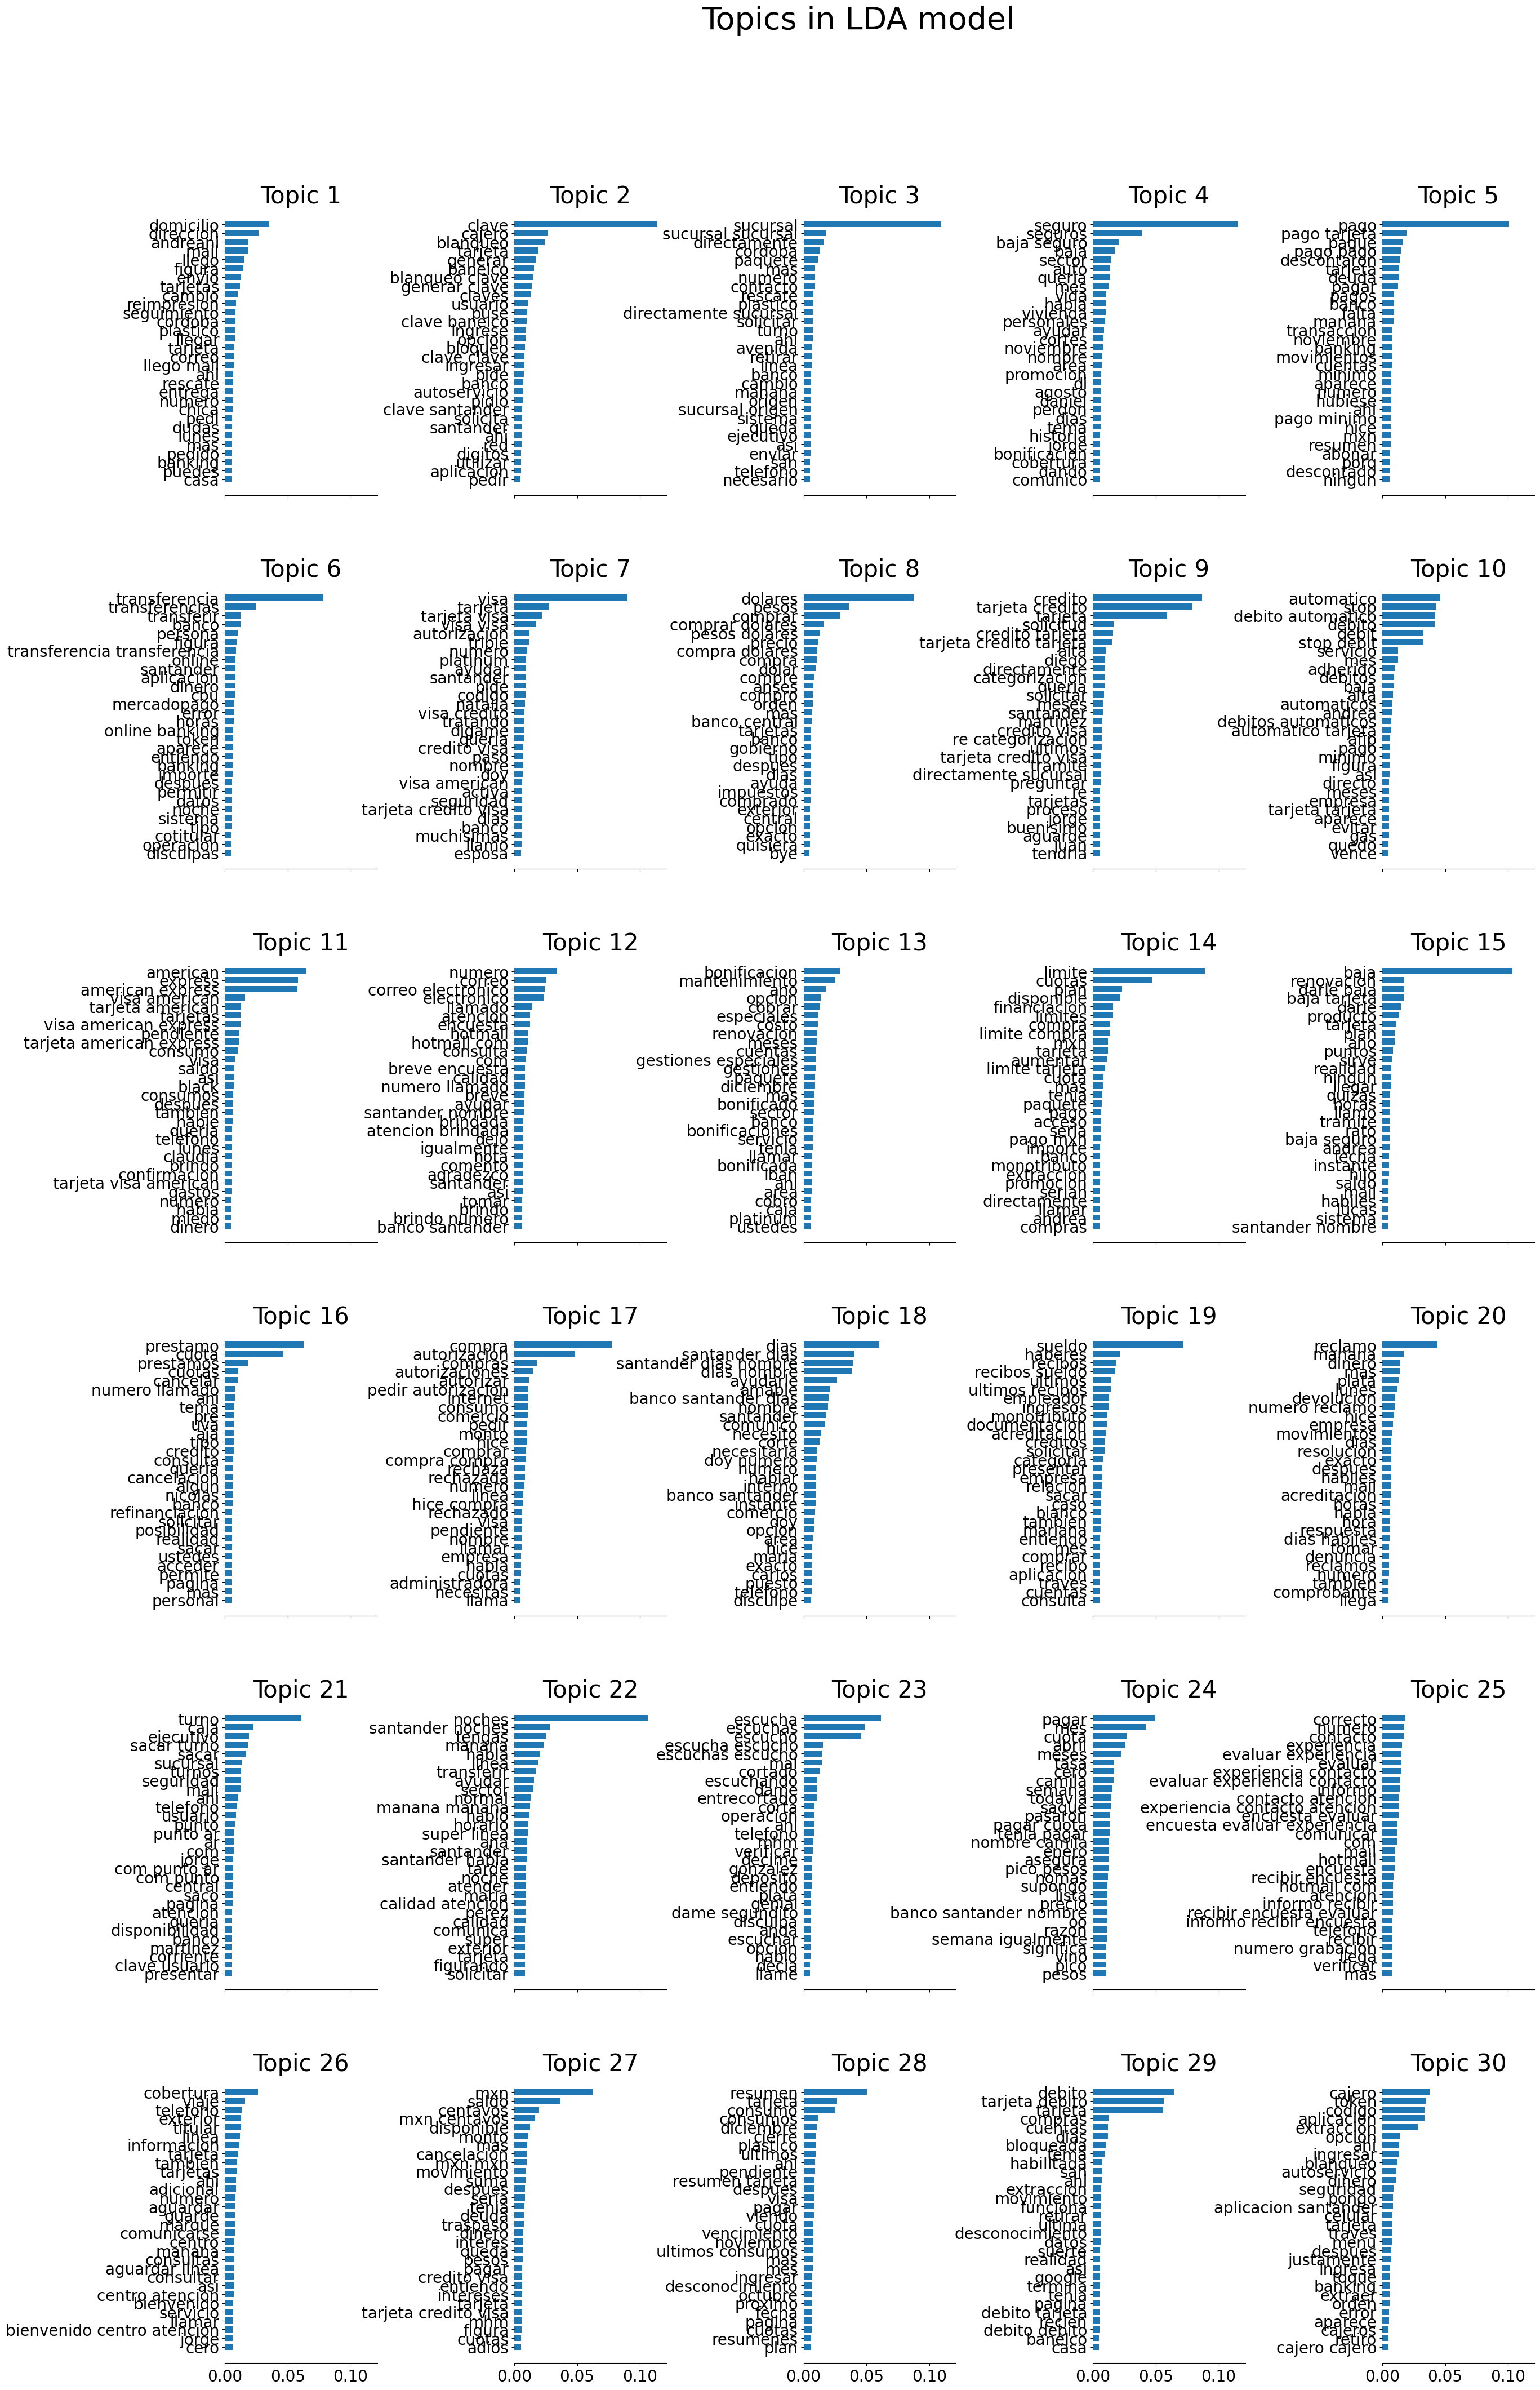

In [56]:
plot_top_words(lda, vec.get_feature_names_out(), 30, "Topics in LDA model")

In [40]:
desc_topicos = ["Tarjetas Consumos", "Claves", "Inglés", "Sucursales", "Seguros","6", "Tarjeta Solicitud", "Pagos", "Inversiones","Transferencias", "Encuesta final", "Tarjeta Consumos", "Autorización Compra", "Límite", "Sueldos", "Stop Debit", "Bonificaciones", "Préstamos", "Extracciones", "20", "Turno", "22", "Mercado Pago", "24", "App", "Tarjeta Débito", "Tarjetas", "Problema de comunicación", "29", "Gestiones Especiales"]

In [41]:
lda.components_ = (lda.components_.T/lda.components_.sum(axis = -1)).T

In [42]:
colors = ['\033[95m','\033[94m','\033[96m','\033[92m','\033[93m','\033[91m','\033[0m','\033[1m','\033[4m']

def analyze(text, length=100, overlap = 0):
    length = max([len(text)//8,1000])
    sub_text = [text[i:i+length] for i in range(0, len(text), length-overlap)]
    for idx,texto in enumerate(sub_text):
        print(colors[idx], texto, end="")
    print()
    x = vec.transform(sub_text)
    topics_list = lda.transform(x)
    topics_list = (topics_list.T/topics_list.sum(axis=-1)).T
    for idx,topics in enumerate(topics_list):
        for topico, desc in zip(topics, desc_topicos):
            if topico > 0.1:
                print(colors[idx],desc, ":", topico)

In [46]:
# x = .transform(sub_text)
topics_list = lda.transform(x)

NameError: name 'x' is not defined

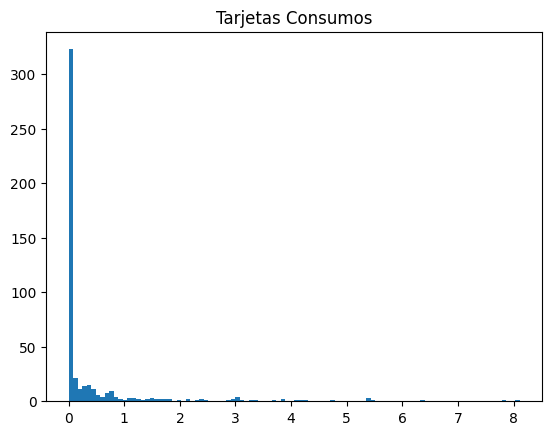

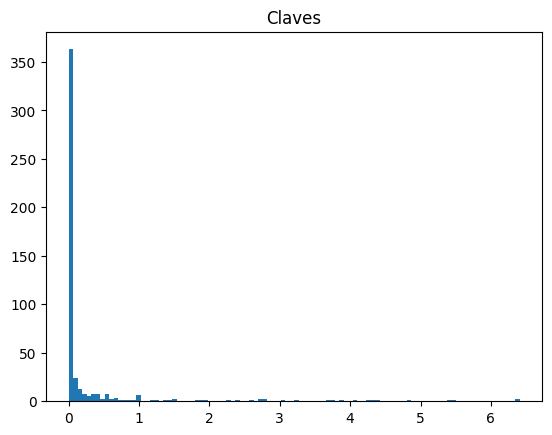

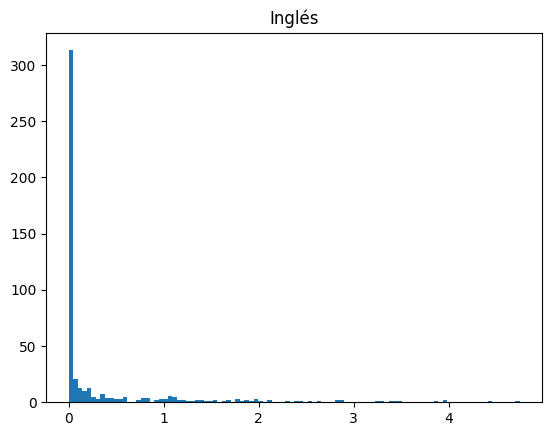

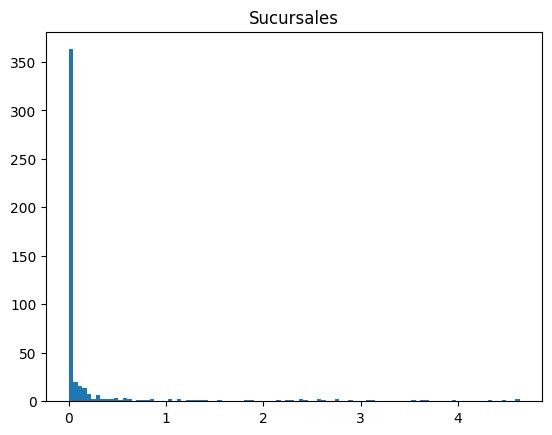

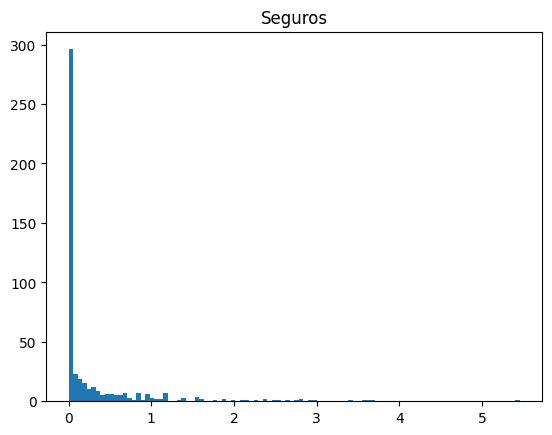

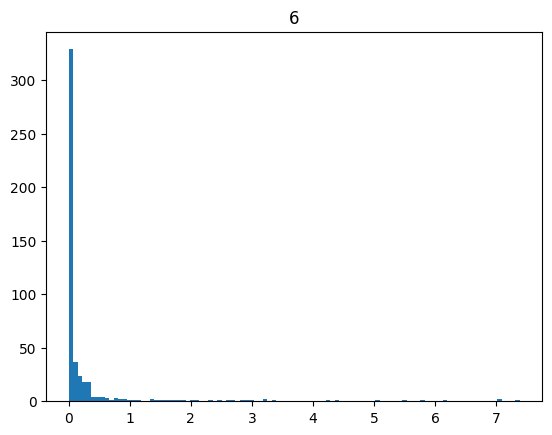

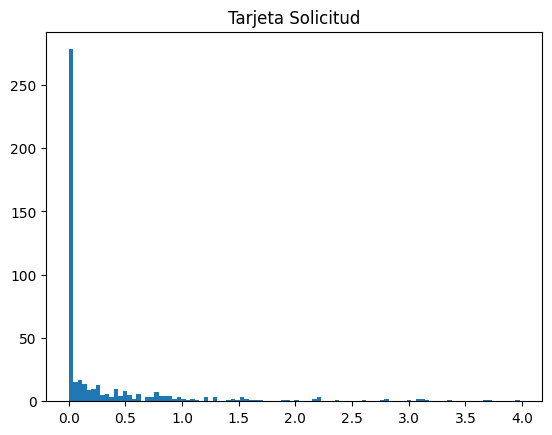

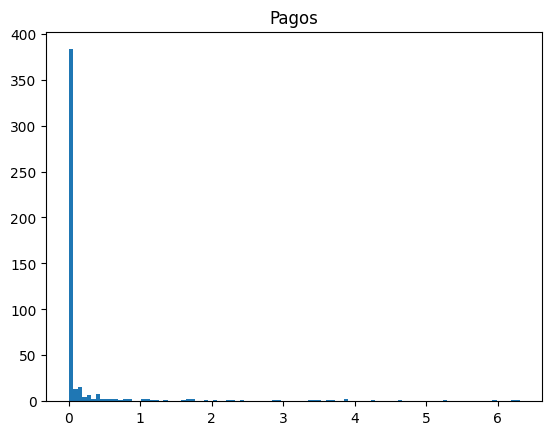

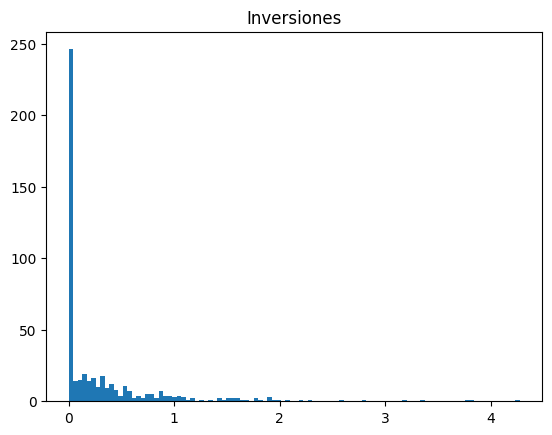

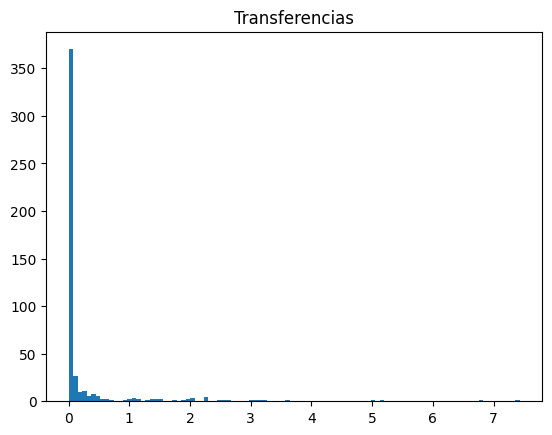

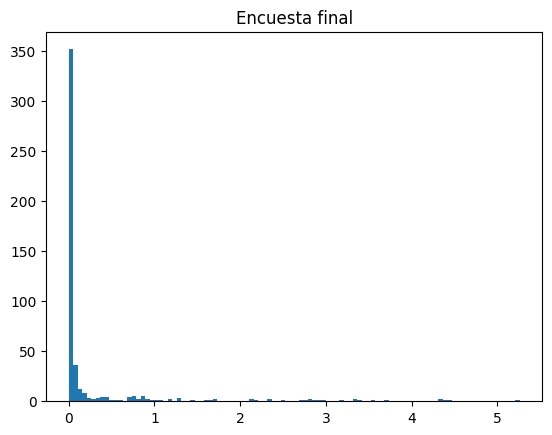

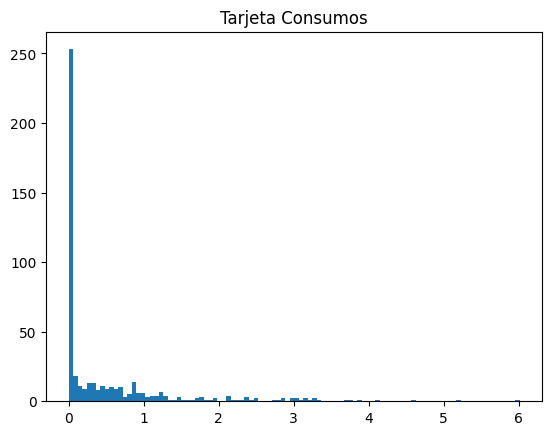

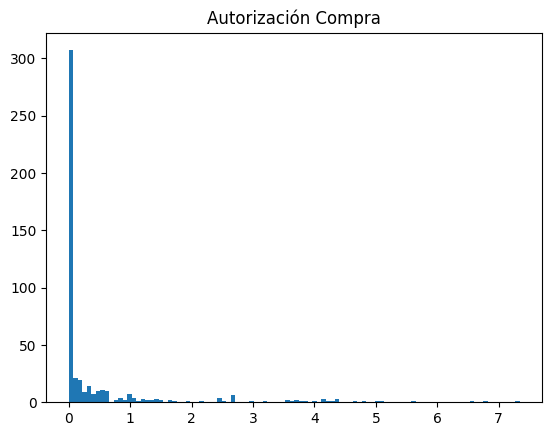

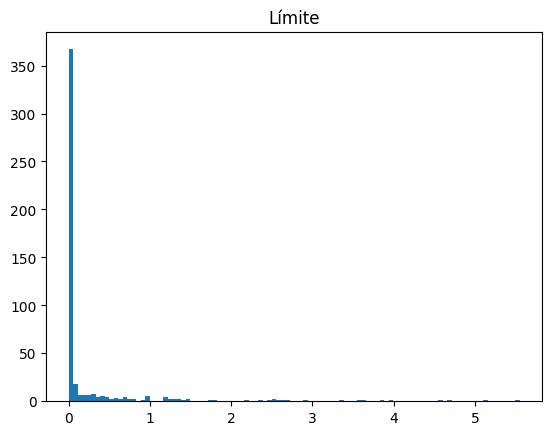

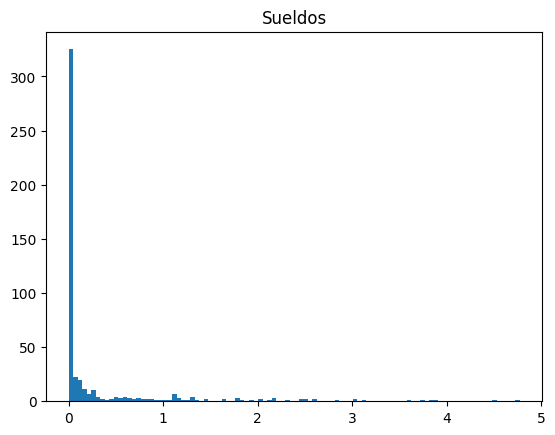

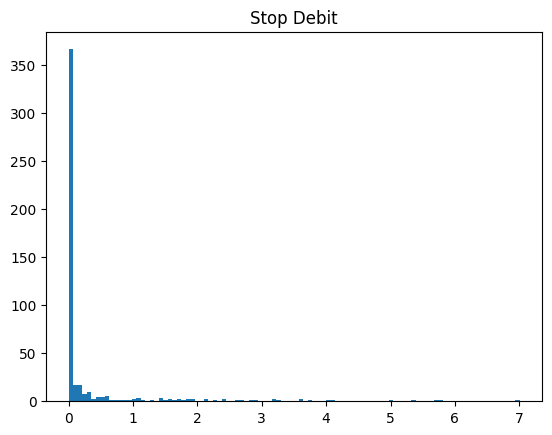

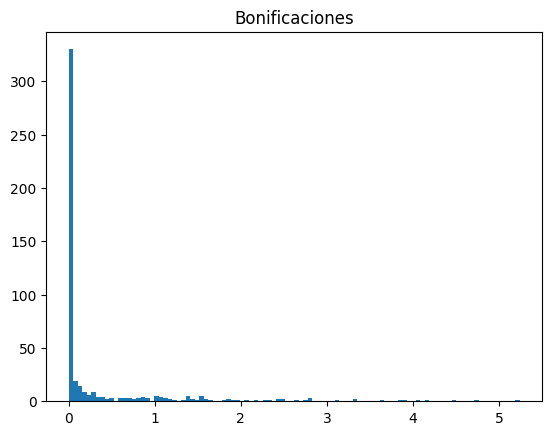

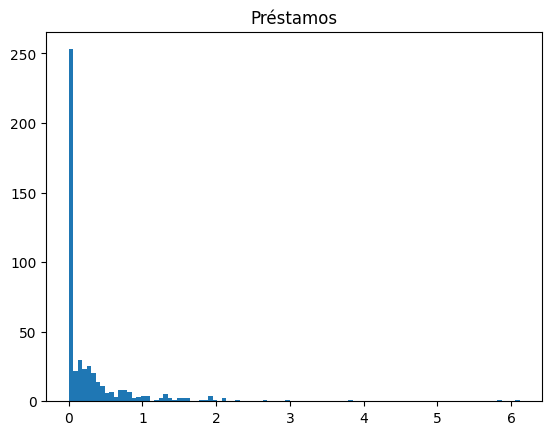

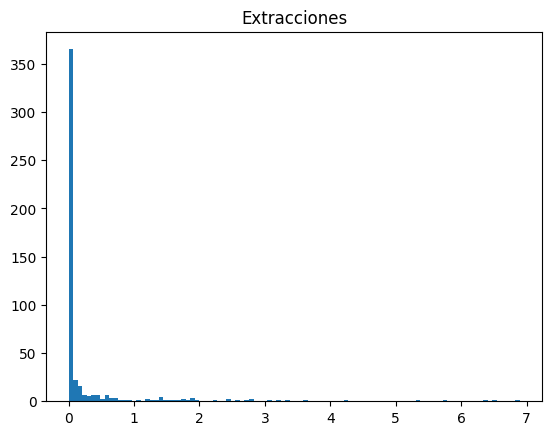

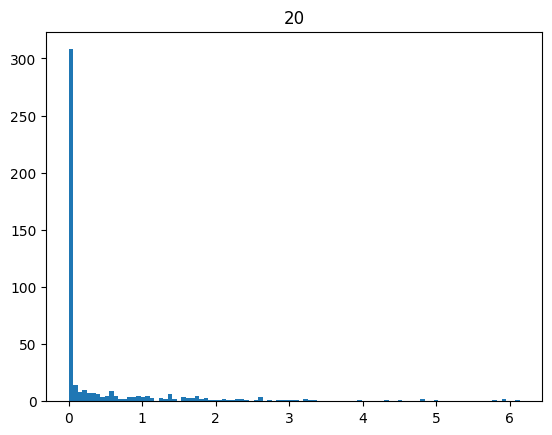

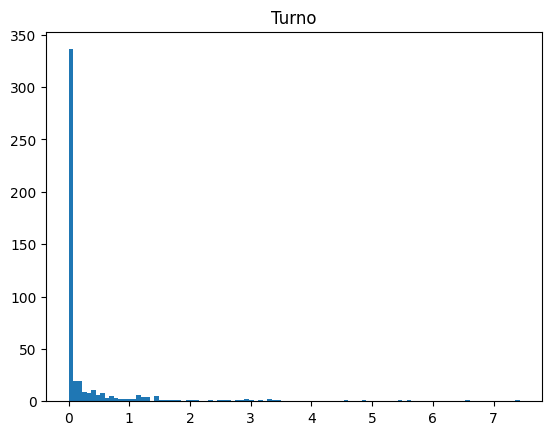

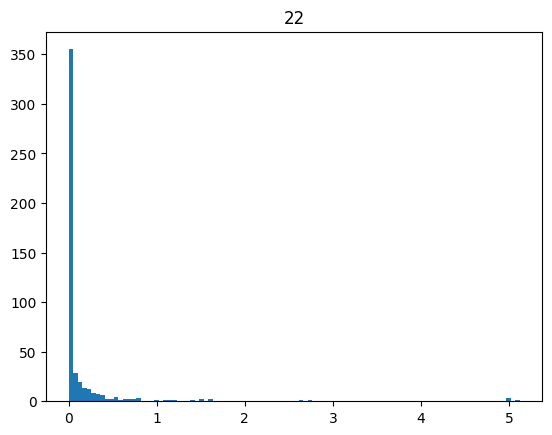

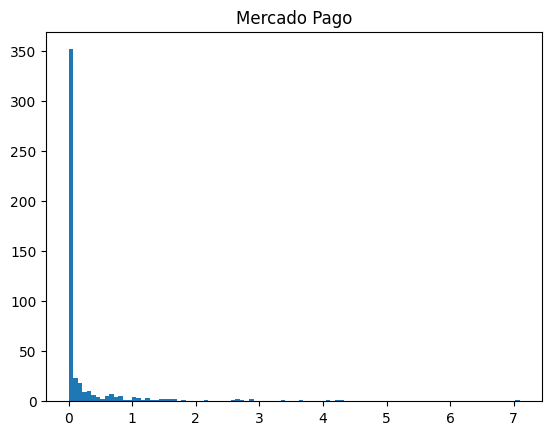

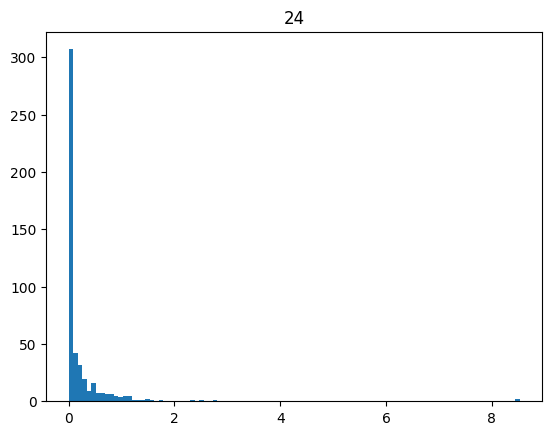

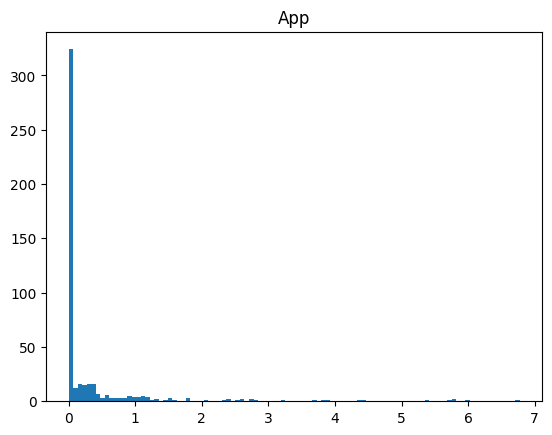

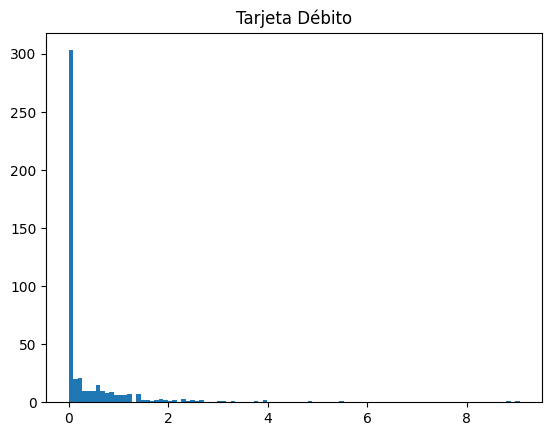

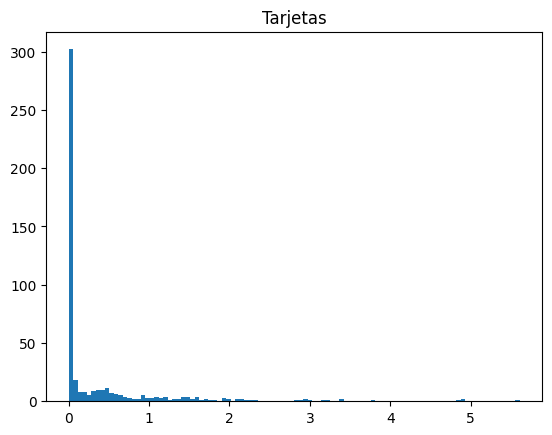

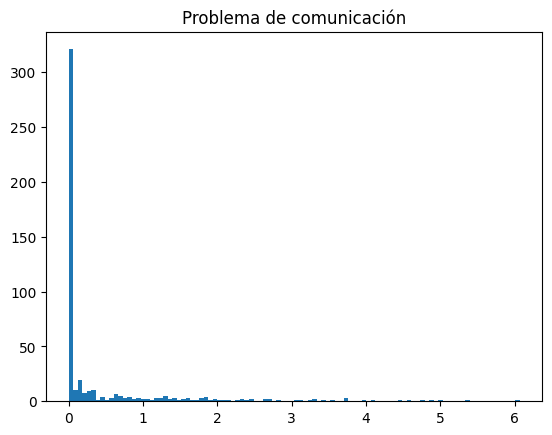

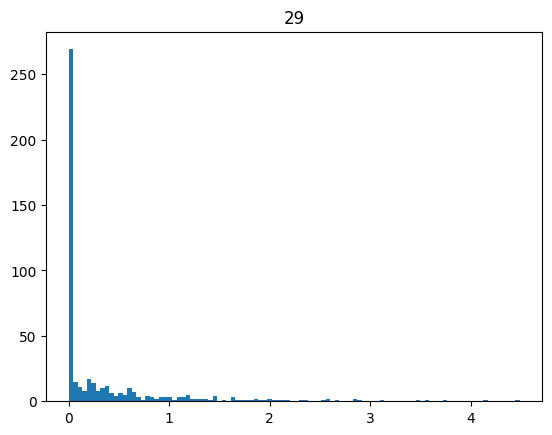

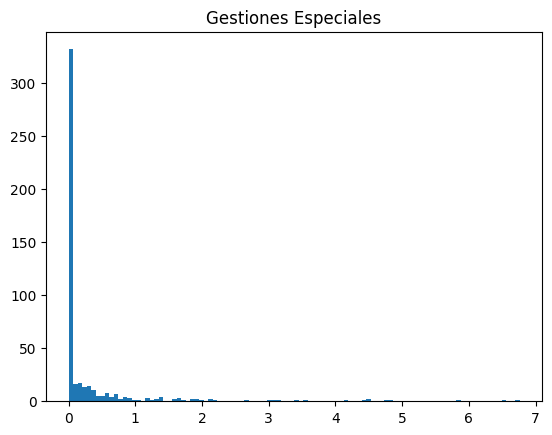

In [47]:
X_topics = lda.transform(X).T
for desc,x_topic in zip(desc_topicos,X_topics):
    plt.hist(x_topic,bins=100)
    plt.title(desc)
    plt.show()

In [55]:
analyze(df.text[0])

 ¿Banco Santander buen día mi nombre es Lucila coronel, señor Manuel García, En qué puedo asistirle?Buenos días, hasta luego. Consulta sobre transferencia. Soy nuevo en el Banco. Hace 10:30 h mañana la cuenta en su momento hasta que todas las claves y porque puede ser herencia. Ahora tengo una transferencia del ordenador y no me permite decir lo que es válido.Sobre inválido la figura.Sí.Un segundo, por favor.¿La verdad es que desde que vi la cuenta hoy hice una transferencia para probarlo, no?Si pasa que lamentablemente en estos días se estuvo viendo incidencia justamente con transferencias y De hecho en el día de hoy hay bastantes incidencias con respecto al uso de online banking de la aplicación porque está ingresando mucha gente para poder hacer compra de dólar.No es un problema de Del del sistema, no del token.El deme, un segundo que verificó porque si el error pues sale con respecto al póker, puede ser que haya algún inconveniente con el token, un segundito nada más.¿Vale?No.¿Podr

In [48]:
list(zip(best_class, best_topic))

[('TARJETAS SANTANDER', 1),
 ('TARJETAS SANTANDER2', 7),
 ('TRANSFERENCIAS', 6),
 ('SEGUROS', 4),
 ('CLAVES Y ACCESOS', 2),
 ('EXTRACCIONES Y DEPOSITOS', 20),
 ('BENEFICIOS', 13),
 ('CUENTAS SANTANDER', 10),
 ('PRESTAMOS', 12),
 ('INVERSIONES', 8),
 ('TARJETAS SANTANDER1', 9),
 ('OTROS', 17),
 ('FRAUDE', 11),
 ('CAJA DE SEGURIDAD', 21)]

In [49]:
clf.classes_

array(['BENEFICIOS', 'CAJA DE SEGURIDAD', 'CLAVES Y ACCESOS',
       'CUENTAS SANTANDER', 'EXTRACCIONES Y DEPOSITOS', 'FRAUDE',
       'INVERSIONES', 'OTROS', 'PRESTAMOS', 'SEGUROS',
       'TARJETAS SANTANDER', 'TARJETAS SANTANDER1', 'TARJETAS SANTANDER2',
       'TRANSFERENCIAS'], dtype='<U24')

In [50]:
analyze

<function __main__.analyze(text, length=100, overlap=0)>

In [ ]:
class_vectors = np.exp(clf.feature_log_prob_)

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=14, metric='cosine')
neigh.fit(class_vectors)

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NearestNeighbors(metric='cosine', n_neighbors=14)

In [ ]:
d_clases = dict()
for idx, topic in enumerate(topics):
    clase = clf.classes_[neigh.kneighbors([topic])[1][0]][0]
    sim = neigh.kneighbors([topic])[0][0][0]
    if clase in d_clases:
        if d_clases[clase][1] > sim:         
            d_clases[clase] = (idx+1,sim)
    else:
        d_clases[clase] = (idx+1,sim)

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=20, metric='cosine')
neigh.fit(topics)

d_clases = dict()
for idx, clase in enumerate(class_vectors):
    topic = neigh.kneighbors([clase])[1][0][0]
    sim = neigh.kneighbors([clase])[0][0][0]
    d_clases[clf.classes_[idx]] = (topic,sim)

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
d_clases

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'BENEFICIOS': (14, 0.5896652416450472),
 'CAJA DE SEGURIDAD': (29, 0.6378651729840927),
 'CLAVES Y ACCESOS': (29, 0.6450128057931329),
 'CUENTAS SANTANDER': (14, 0.602360719229756),
 'EXTRACCIONES Y DEPOSITOS': (18, 0.6237952477075156),
 'FRAUDE': (29, 0.6353273732753162),
 'INVERSIONES': (29, 0.6335015271037137),
 'OTROS': (29, 0.6142599284156968),
 'PRESTAMOS': (29, 0.62783008472936),
 'SEGUROS': (4, 0.5898925841839038),
 'TARJETAS SANTANDER': (0, 0.46098815132356474),
 'TARJETAS SANTANDER1': (29, 0.6473535351394728),
 'TARJETAS SANTANDER2': (29, 0.6460772298645883),
 'TRANSFERENCIAS': (22, 0.6014342511548119)}

In [ ]:
sims = np.dot(class_vectors, topics.T)
best_class = list()
best_topic = list()
for _ in range(14):
    clase, topic = np.unravel_index(sims.argmax(), sims.shape)
    best_class.append(clf.classes_[clase])
    best_topic.append(topic+1)
    sims[clase,:]=0.0
    sims[:,topic]=0.0

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
best_class

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['TARJETAS SANTANDER',
 'SEGUROS',
 'BENEFICIOS',
 'EXTRACCIONES Y DEPOSITOS',
 'CUENTAS SANTANDER',
 'CLAVES Y ACCESOS',
 'INVERSIONES',
 'PRESTAMOS',
 'TRANSFERENCIAS',
 'TARJETAS SANTANDER2',
 'OTROS',
 'FRAUDE',
 'CAJA DE SEGURIDAD',
 'TARJETAS SANTANDER1']

In [ ]:
best_topic

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[1, 5, 13, 19, 10, 2, 8, 4, 23, 12, 11, 15, 30, 9]

In [ ]:
lda.transform(X)[:,10].argsort()[::-1][:8]

array([351, 380, 348, 307,  51, 322, 461, 409])

In [ ]:
lda.transform(X)[96]

array([0.06509297, 0.27051132, 0.        , 0.02538517, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00710875,
       0.        , 0.        , 0.03876712, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00788739, 0.        , 0.00606072,
       0.        , 0.        , 0.        , 0.        , 0.00673572])

In [ ]:
lda.transform(X)[168].argsort()[::-1]+16

array([34, 41, 24, 21, 31, 42, 39, 40, 26, 38, 36, 44, 19, 35, 20, 25, 27,
       17, 23, 22, 18, 45, 30, 28, 29, 32, 33, 37, 43, 16])

In [ ]:
df.text[333]

' Hola, Bárbara, ¿qué tal? Estoy llamando para hacer una consulta sobre una bonificación que tengo en el servicio de la cuenta. O sea, tengo una cuenta Platinum que me la ofrecieron creo que el año pasado. Me dieron la posibilidad de... A mí me llamaron telefónicamente desde el banco diciendo que me ofrecían al activar cuatro servicios de débito automático en las tarjetas de crédito. Me ofrecían la cuenta gratuita de por vida, la cuenta Platinum. Además me dijeron que la cuenta Platinum tenía un límite en dólares. Tenía establecido, entonces que se iba ir actualizando en base a la inflación y lo que sea. Bueno, en ese momento yo accedí, me llamaron nuevamente, no me acuerdo si se llamó alguien del banco, para activar los cuatro de los débitos automáticos activamos tres en una tarjeta American Express y un débito automático en la Visa. El servicio que tengo entendido que se mantuvo bonificado durante todo el año, creo que hace un año esto, tal vez hace menos. Y ahora, hace unos días, un

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
(X.toarray().T/X.toarray().sum(axis=1))

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-118-cd33e71ec960>:1: RuntimeWarning: invalid value encountered in true_divide
  (X.toarray().T/X.toarray().sum(axis=1))


array([[0.01323303, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00616575],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
pyLDAvis.sklearn.prepare(lda, X, vec,)

/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/cselmo/.conda/envs/media_downloaders/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.040586 -0.046124       1        1  11.800163
4     -0.048120  0.001050       2        1  10.640173
6     -0.010576 -0.163079       3        1  10.089675
3     -0.049128 -0.018956       4        1   9.921509
10    -0.047994  0.068545       5        1   9.289337
5     -0.035081 -0.009067       6        1   7.569129
2     -0.035890  0.190422       7        1   6.699179
11    -0.045454 -0.008459       8        1   6.131132
0     -0.048152  0.085366       9        1   5.897548
9     -0.034185 -0.084598      10        1   5.078049
7     -0.048552 -0.038658      11        1   5.053138
13    -0.024234 -0.092791      12        1   3.833029
14    -0.023257  0.162544      13        1   3.039533
8     -0.015926 -0.055910      14        1   3.010961
1      0.507134  0.009715      15        1   1.947448, topic_info=                 Term         Freq        Total Category  logprob  loglift
1465              the   318.000000   318.000000  Default  30.0000  30.0000
295             clave   506.000000   506.000000  Default  29.0000  29.0000
1421          tarjeta  2298.000000  2298.000000  Default  28.0000  28.0000
408           credito   598.000000   598.000000  Default  27.0000  27.0000
1133            pesos   898.000000   898.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1051               ok    26.685902   616.404287  Topic15  -4.2358   0.7989
1133            pesos    12.716448   898.515664  Topic15  -4.9771  -0.3192
1079             pago     9.952217   800.365805  Topic15  -5.2222  -0.4486
1573             visa     8.044493   552.367568  Topic15  -5.4350  -0.2906
1429  tarjeta credito     6.951602   346.651377  Topic15  -5.5810   0.0293

[928 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.073310  abajo
0         3  0.073310  abajo
0         5  0.128293  abajo
0         6  0.219931  abajo
0         8  0.036655  abajo
...     ...       ...    ...
1599     11  0.353096  women
1600      2  0.062942    www
1600      6  0.251766    www
1600      9  0.629416    www
1602     15  0.992031    you

[3839 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 5, 7, 4, 11, 6, 3, 12, 1, 10, 8, 14, 15, 9, 2])